<a href="https://colab.research.google.com/github/franklaercio/titanic_machine_learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd 

titanic_url = "https://raw.githubusercontent.com/franklaercio/titanic_machine_learning/master/train.csv"
titanic_data = pd.read_csv(titanic_url)
titanic_data = titanic_data

In [42]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

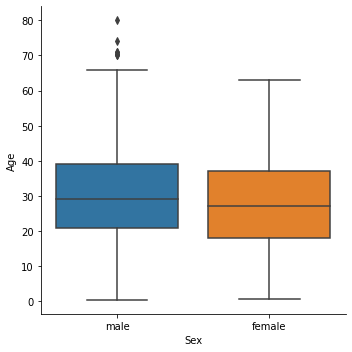

In [46]:
sns.catplot(x="Sex", y="Age", kind="box", data=titanic_data)

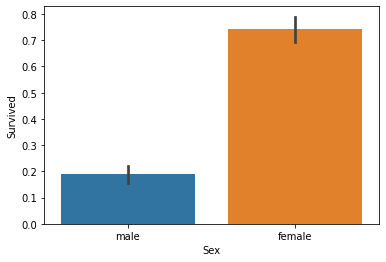

In [47]:
sns.barplot(x='Sex', y='Survived', data=titanic_data,)

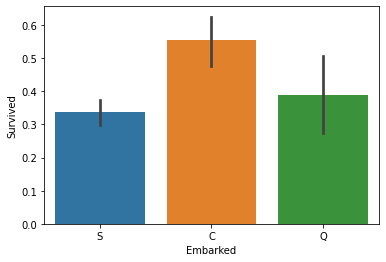

In [48]:
sns.barplot(x='Embarked', y='Survived', data=titanic_data,)

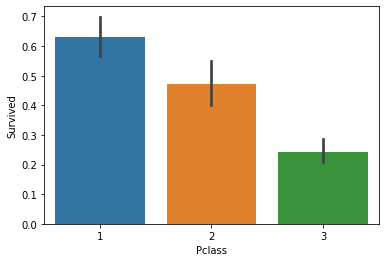

In [49]:
sns.barplot(x='Pclass', y='Survived', data=titanic_data,)

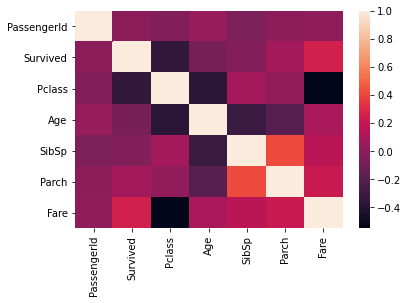

In [50]:
sns.heatmap(titanic_data.corr())

In [63]:
y = titanic_data.Survived

titanic_features = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']
X = titanic_data[titanic_features]

In [60]:
X.describe()

,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.381594,32.204208
std,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,7.910400
50%,3.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,0.000000,31.000000
max,3.000000,8.000000,6.000000,512.329200


In [61]:
X.head()

,Pclass,SibSp,Parch,Fare,Sex,Embarked,Cabin
0,3,1,0,7.2500,male,S,NaN
1,1,1,0,71.2833,female,C,C85
2,3,0,0,7.9250,female,S,NaN
3,1,1,0,53.1000,female,S,C123
4,3,0,0,8.0500,male,S,NaN


In [64]:
from sklearn.tree import DecisionTreeRegressor

#Define model
titanic_model = DecisionTreeRegressor(random_state=1)

#Fit model
titanic_model.fit(X, y)

print("Making predictions for the survived")
print(X.head())
print("The predictions are:")
print(titanic_model.predict(X.head()))

ValueError: ignored

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [23]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 150]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(scores, key=scores.get)

print(best_tree_size)

25


In [24]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
melb_preds = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, melb_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.3482608695652174


In [40]:
titanic_url_test = "https://raw.githubusercontent.com/franklaercio/titanic_machine_learning/master/test.csv"
titanic_data_test = pd.read_csv(titanic_url_test)

titanic_features_test = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked', 'Cabin', 'Fare_bin', 'Fsize']
test_X = titanic_data_test[titanic_features_test]
test_preds = titanic_model.predict(test_X)

print(test_preds)

#output = pd.DataFrame({'Id': titanic_data_test.PassengerId, 'Suviverd': test_preds})
#output.to_csv('submission.csv', index=False)

ValueError: ignored